In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import plot_column

## Summary

This notebook is a column by column exploration of each features relation to `left` and minor data cleaning.

## Import Data & Minor Cleaning

In [2]:
df = pd.read_csv('./data/HR_data.csv')

# clean typo column names
columns = {'average_montly_hours':'average_monthly_hours',
           'number_project':'number_projects',
           'time_spend_company':'years_with_company',
           'Work_accident':'work_accident',
           'Department':'department'}

df.rename(columns=columns, inplace=True)

df.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration by Column

### satisfaction_level

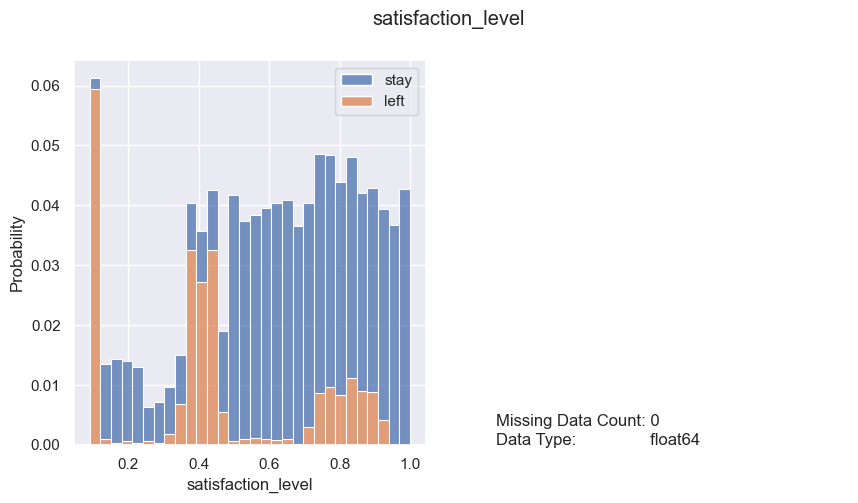

In [3]:
col = df.columns[0]
plot_column(df, col)

##### <u>Dictionary:</u>
`satisfaction_level` is a continuous scale between 0 and 1 of a self-assessed employee satisfaction.  1 is very satisfied and 0 not satisfied.

##### <u>First Look Assessment:</u>
A near $0$ and near $0.4$ `satisfaction_level` correlates with a higher probability of `left`.
##### <u>Cleaning Action:</u>
No missing data, correct data type, no action required.

***
<br><br><br>

### last_evaluation

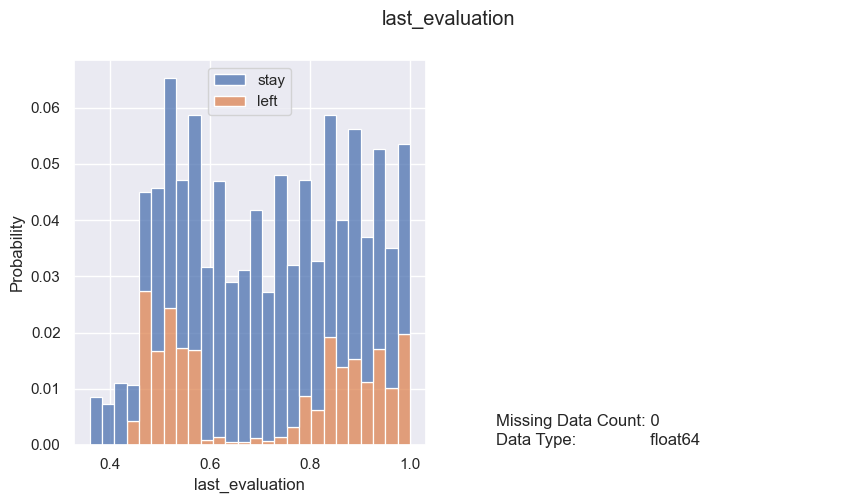

In [4]:
col = df.columns[1]
plot_column(df, col)

##### <u>Dictionary:</u>
`last_evaluation` is a continuous scale between 0 and 1 of the employee's last performance review.

##### <u>First Look Assessment:</u>
Mediocre `last_evaluation` correlates with the highest probability of staying.

##### <u>Cleaning Action:</u>
No missing data, correct data type, no action required.

***
<br><br><br>

### number_projects

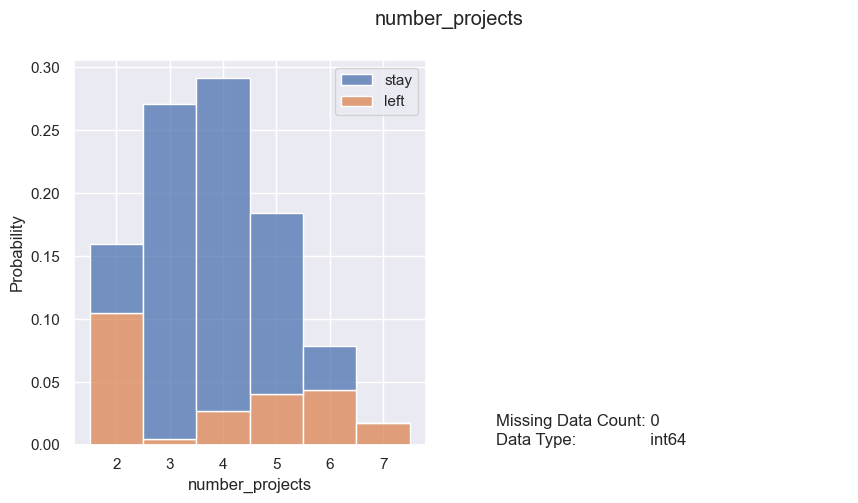

In [5]:
col = df.columns[2]
plot_column(df, col, discrete=True)

##### <u>Dictionary:</u>
`number_project` is a discrete integer representing the number of projects an employee contributes to.

##### <u>First Look Assessment:</u>
`number_projects`$=3$ appears to be the ideal number of projects to optimize employee retention.

##### <u>Cleaning Action:</u>
No missing data, correct data type, no action required.

***
<br><br><br>

### average_monthly_hours

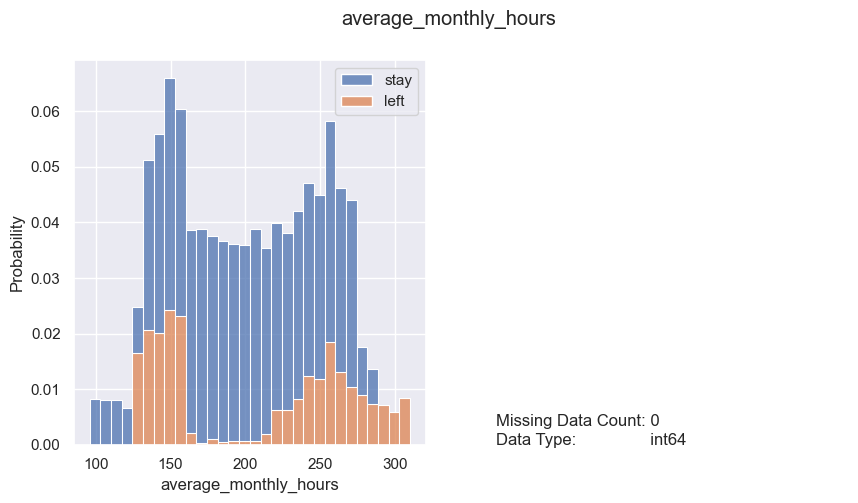

In [6]:
col = df.columns[3]
plot_column(df, col)

##### <u>Dictionary:</u>
`average_monthly_hours` is an integer representing the average number of hours an employee works a month.

##### <u>First Look Assessment:</u>
Employee retention appears to be optimized around a 40 - 50 hour work week.

##### <u>Cleaning Action:</u>
No missing data, correct data type, no action required.

***
<br><br><br>

### years_with_company

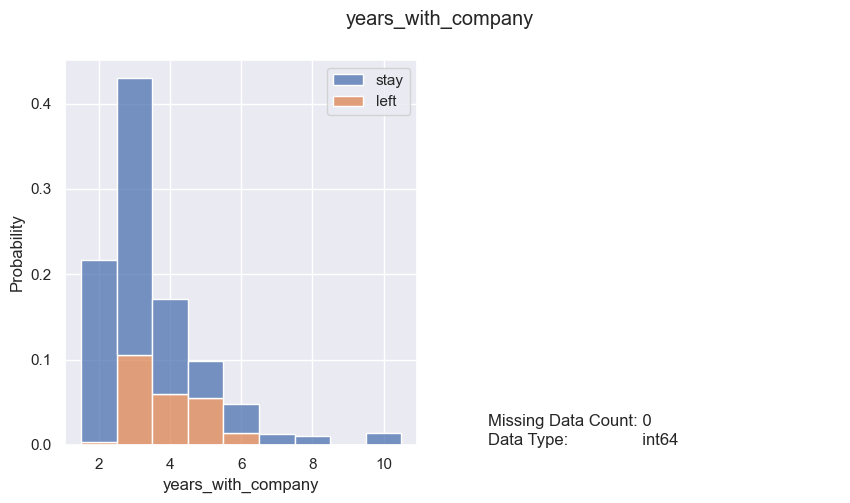

In [7]:
col = df.columns[4]
plot_column(df, col, discrete=True)

##### <u>Dictionary:</u>
`years_with_company` is an integer representing the number of years an employee has been with the company.

##### <u>First Look Assessment:</u>
Year 2 has a very high retention rate, which falls to a minimum of 43% at year 5.


##### <u>Cleaning Action:</u>
No missing data, correct data type, no action required.

***
<br><br><br>

### work_accident

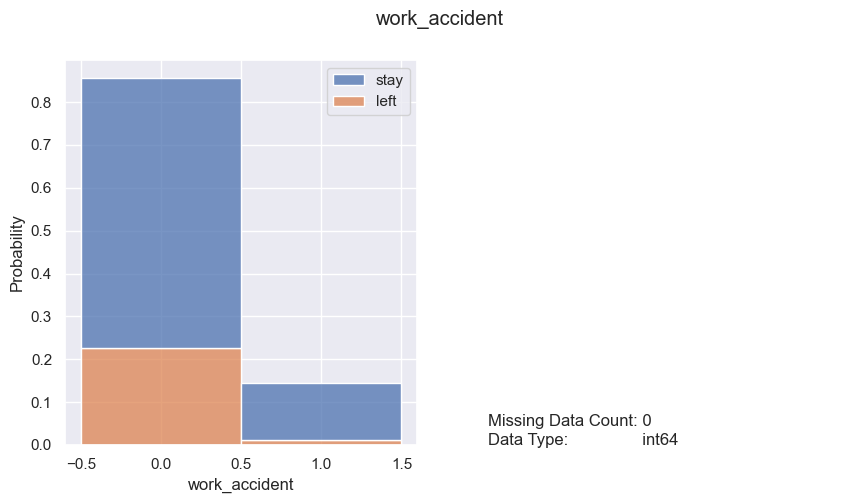

In [8]:
col = df.columns[5]
plot_column(df, col, discrete=True)

##### <u>Dictionary:</u>
`work_accident` is an integer representing if the employee had a work accident.  1 for incident, 0 for no incident.

##### <u>First Look Assessment:</u>
Interestingly, having a work accident boosts employee retention from 73% to 92%.

##### <u>Cleaning Action:</u>
No missing data, correct data type, no action required.

***
<br><br><br>

### promotion_last_5years

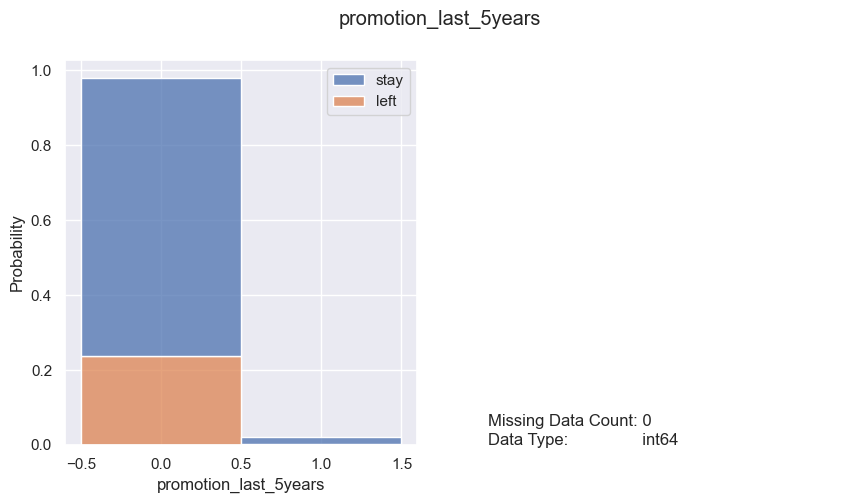

In [9]:
col = df.columns[7]
plot_column(df, col, discrete=True)

##### <u>Dictionary:</u>
`promotion_last_5years` is an integer representing if the employee has been promoted in the last 5 years. 1 for promotion.

##### <u>First Look Assessment:</u>
While promoted employees have high retention rates, the small sample size makes this data point less reliable than the others.

##### <u>Cleaning Action:</u>
No missing data, correct data type, no action required.

***
<br><br><br>

### department

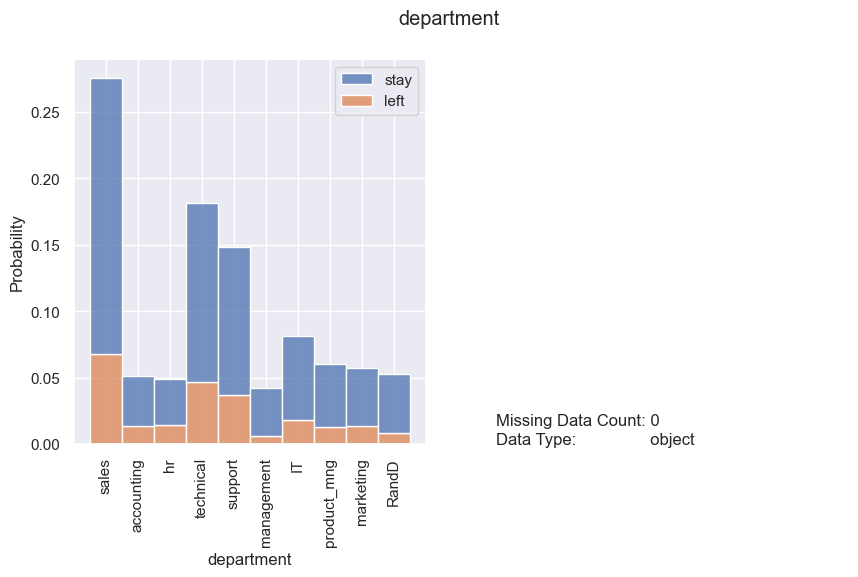

In [10]:
col = df.columns[8]
plot_column(df, col, rotation=90, discrete=True)

##### <u>Dictionary:</u>
`department` is a categorical feature recording the department of the employee.

##### <u>First Look Assessment:</u>
`department` has no obvious correlation to `left`.

##### <u>Cleaning Action:</u>
No missing data, set datatype to `'categorical'`

***
<br><br><br>

### salary

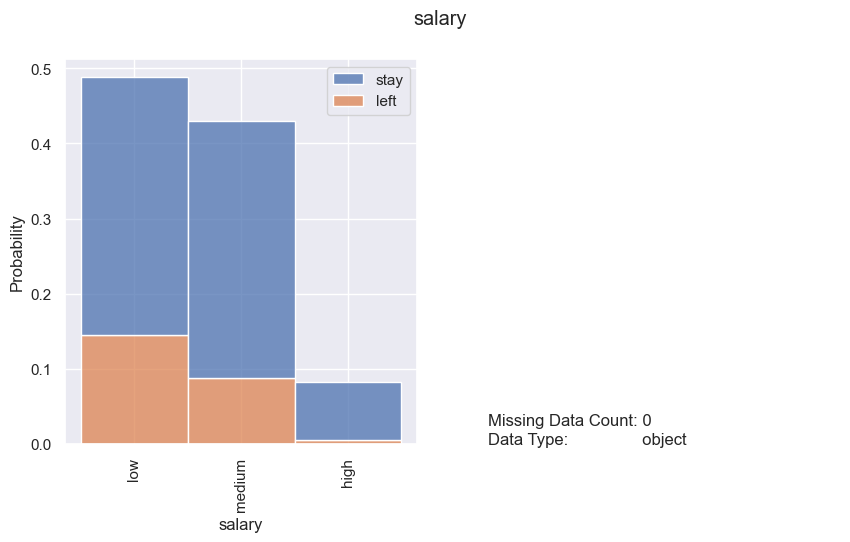

In [11]:
col = df.columns[9]
plot_column(df, col, rotation=90, discrete=True)

##### <u>Dictionary:</u>
`salary` is a categorical feature recording the salary level of the employee.

##### <u>First Look Assessment:</u>
Raising salaries does appear to correlate with employee retention, with retention levels of 70%, 79%, and 93%, respectively.


##### <u>Cleaning Action:</u>
No missing data, set datatype to `'categorical'`

***
<br><br><br>

## Cleaning

In [12]:
# convert categorical data
df['department'] = df['department'].astype('category')
df['salary']     = df['salary'].astype('category')

# dummy cols will be created for categorial data
df_cleaned = pd.get_dummies(df, drop_first=True, dtype=int)

# save
# df_cleaned.to_csv('./data/HR_data_for_model.csv')

## Conclusion

There is almost no cleaning required, just categorical dummy conversion. <br>
`satisfaction_level`, `number_projects`, and `average_monthly_hours` appear to be the best candidates for modeling.

### Next Step: [Modeling](2_Modeling.ipynb)